# Assignment 2: Fitzhugh-Nagumo Oscillator Model
# Author: G Pradeep EE16B050

The calculated values for I1 and I2 are 0.316 and 0.682 respectively for a=0.5, b=0.1 and r=0.1. The values have been determined ny observing oscillatory region behaviour of the neuron.

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [112]:
def runFN(I, v0, w0, a, b, r, niter, dt):
    """
    Solves the state-equation for the oscillator and stores the result 
    in the arrays vhist, whist and fhist respectively using Single Forward
    Euler Integration.
    
    Return vhist, whist, fhist and t.
    """
    
    t=np.arange(0, niter*dt, dt)
    vhist=np.zeros_like(t)
    whist=np.zeros_like(t)
    fhist=np.zeros_like(t)
    vhist[0]=v0
    whist[0]=w0
    fhist[0]=calcf(v0,a)
    for i in range(1,niter):
        v_=vhist[i-1]
        w_=whist[i-1]
        f_=fhist[i-1]
        v=v_+(calcf(v_, a)-w_+I)*dt
        w=w_+(b*v_-r*w_)*dt
        f=calcf(v,a)
        vhist[i]=v
        whist[i]=w
        fhist[i]=f
    return vhist, whist, fhist, t
        
def calcf(v,a):
    """
    Calculates f
    """
    return -v*(v-a)*(v-1)

def v_(I, v, w, a, b, r):
    """
    Calculates dv/dt
    """
    return calcf(v, a)-w+I

def w_(I, v, w, a, b, r):
    """
    Calculates dw=dt
    """
    return b*v-r*w

def calcvnc(I, v, a, b, r):
    """
    Calculates the v-nullcline for the system
    """
    return calcf(v,a)+I

def calcwnc(I, v, a, b, r):
    """
    Calculates the w-nullcline for the system
    """
    return (b/r)*v

def phaseplot(vmin, vmax, wmin, wmax, step, I, a, b, r):
    """
    Returns the data required to plot the phase plot for the system.
    """
    v=np.arange(vmin, vmax, step)
    w=np.arange(wmin, wmax, step)
    l, m=np.meshgrid(v,w)
    vd=[]
    wd=[]
    for x, y in itertools.product(v,w):
            vd.append(v_(I, x, y, a, b, r))
            wd.append(w_(I, x, y, a, b, r))
    return m,l,vd,wd



## Case 1:

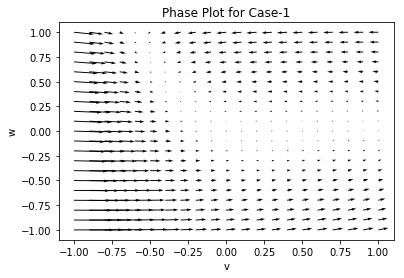

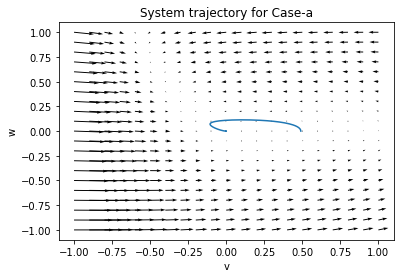

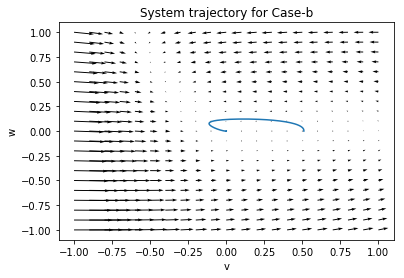

In [113]:
I=0
a=0.5
b=0.1
r=0.1
niter=1000
dt=0.1
w0=0

m,l,vd,wd=phaseplot(-1, 1.01, -1, 1.01, 0.1, I, a, b, r)
plt.quiver(m,l,vd,wd)
plt.xlabel("v")
plt.ylabel("w")
plt.title("Phase Plot for Case-1")
plt.show()

#Case a: v0<a; w0=0
v0=0.49
v,w,f,t=runFN(I, v0, w0, a, b, r, niter, dt)
plt.xlabel("v")
plt.ylabel("w")
plt.plot(v,w)
plt.quiver(m,l,vd,wd)
plt.title("System trajectory for Case-a")
plt.show()

#Case 2: v0>a; w0=0
v0=0.51
v,w,f,t=runFN(I, v0, w0, a, b, r, niter, dt)
plt.xlabel("v")
plt.ylabel("w")
plt.title("System trajectory for Case-b")
plt.plot(v,w)
plt.quiver(m,l,vd,wd)
plt.show()


## Case-2:
1. In this case, the fixed point is at (v,w)= (0.369, 0.369). This is analytically determined.
2. I is chosen to be 0.4

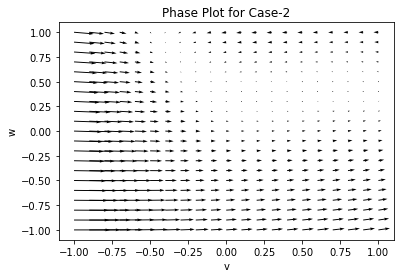

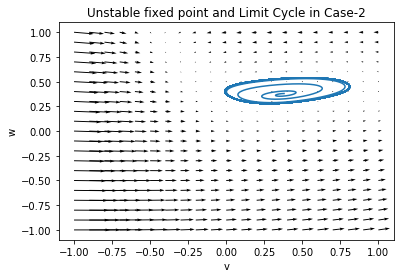

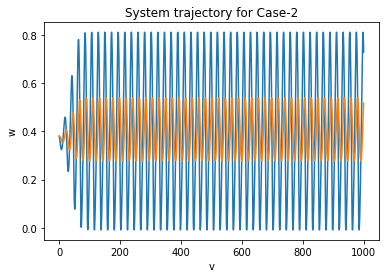

In [114]:
I=0.4
a=0.5
b=0.1
r=0.1
niter=10000
dt=0.1
w0=0

m,l,vd,wd=phaseplot(-1, 1.01, -1, 1.01, 0.1, I, a, b, r)
plt.title("Phase Plot for Case-2")
plt.xlabel("v")
plt.ylabel("w")
plt.quiver(m,l,vd,wd)
plt.show()

#Slightly perturbed state v0 and w0
v0=0.38
w0=0.38

m,l,vd,wd=phaseplot(-1, 1.01, -1, 1.01, 0.1, I, a, b, r)
v,w,f,t=runFN(I, v0, w0, a, b, r, niter, dt)
plt.title("Unstable fixed point and Limit Cycle in Case-2")
plt.xlabel("v")
plt.ylabel("w")
plt.plot(v,w)
plt.quiver(m,l,vd,wd)
plt.show()

v,w,f,t=runFN(I, v0, w0, a, b, r, niter, dt)
plt.title("System trajectory for Case-2")
plt.xlabel("v")
plt.ylabel("w")
plt.plot(t,v)
plt.plot(t,w)
plt.show()


# Case-3:
In this case, the fixed point is at (v,w)=(0.746, 0.746)

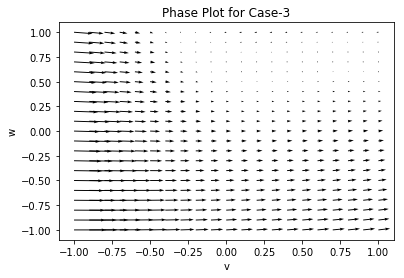

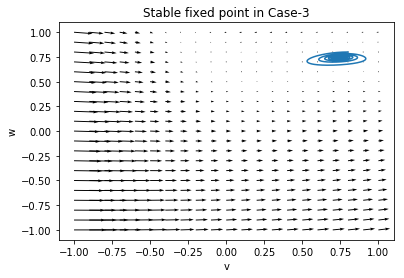

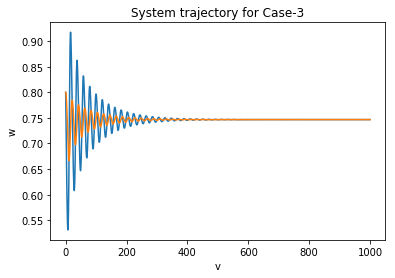

In [115]:

I=0.7
a=0.5
b=0.1
r=0.1
niter=10000
dt=0.1
w0=0

m,l,vd,wd=phaseplot(-1, 1.01, -1, 1.01, 0.1, I, a, b, r)
plt.title("Phase Plot for Case-3")
plt.xlabel("v")
plt.ylabel("w")
plt.quiver(m,l,vd,wd)
plt.show()

#Slightly perturbed state v0 and w0
v0=0.80
w0=0.80

m,l,vd,wd=phaseplot(-1, 1.01, -1, 1.01, 0.1, I, a, b, r)
v,w,f,t=runFN(I, v0, w0, a, b, r, niter, dt)
plt.xlabel("v")
plt.ylabel("w")
plt.plot(v,w)
plt.title("Stable fixed point in Case-3")
plt.quiver(m,l,vd,wd)
plt.show()

v,w,f,t=runFN(I, v0, w0, a, b, r, niter, dt)
plt.title("System trajectory for Case-3")
plt.xlabel("v")
plt.ylabel("w")
plt.plot(t,v)
plt.plot(t,w)
plt.show()


# Case-4:
1. Analytically, the intersections are (0.138, 0.007), (0.362, 0.018) and (1.0, 0.050)
2. (a,b,r) have been chosen as (0.5, 0.01, 0.2).


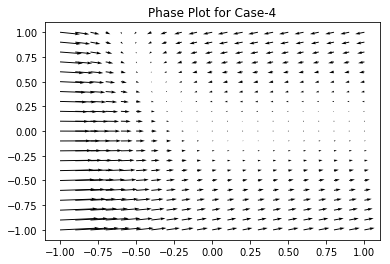

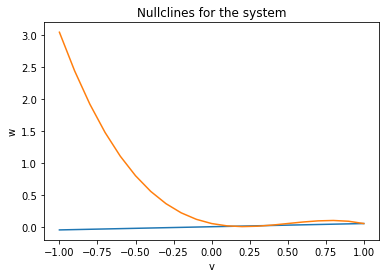

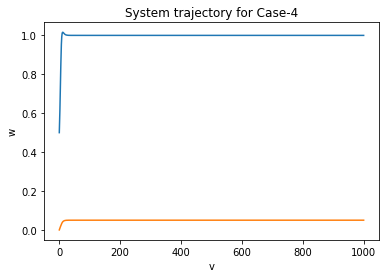

In [117]:

I=0.05
a=0.5
b=0.01
r=0.2
niter=10000
dt=0.1
w0=0

m,l,vd,wd=phaseplot(-1, 1.01, -1, 1.01, 0.1, I, a, b, r)
plt.title("Phase Plot for Case-4")
plt.quiver(m,l,vd,wd)
plt.show()

v=np.arange(-1, 1.01, 0.1)
vhist=[calcvnc(I, x, a, b, r) for x in v]
whist=[calcwnc(I, x, a, b, r) for x in v]
plt.title("Nullclines for the system")
plt.xlabel("v")
plt.ylabel("w")
plt.plot(v, whist, label="w-nc")
plt.plot(v, vhist, label='v-nc')
plt.show()

v0=0.5
w0=0
v,w,f,t=runFN(I, v0, w0, a, b, r, niter, dt)
plt.title("System trajectory for Case-4")
plt.xlabel("v")
plt.ylabel("w")
plt.plot(t,v)
plt.plot(t,w)
plt.show()